In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Loading Dataset

In [28]:
df =pd.read_csv('Mall_Customers.csv')

In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Univariate Analysis

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

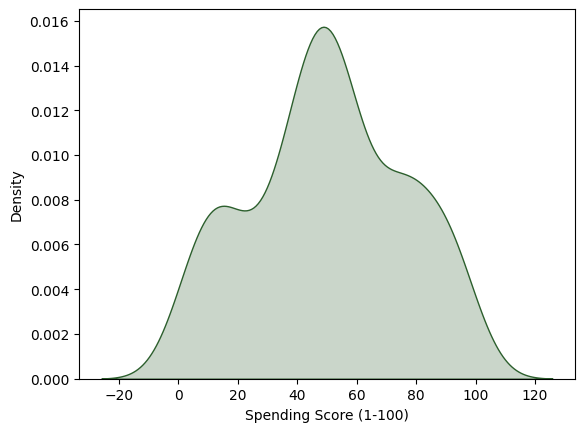

In [6]:
sns.kdeplot(df['Spending Score (1-100)'], fill=True, color="#2C5F2D")

Bi-Variate Analysis

<AxesSubplot:ylabel='Age'>

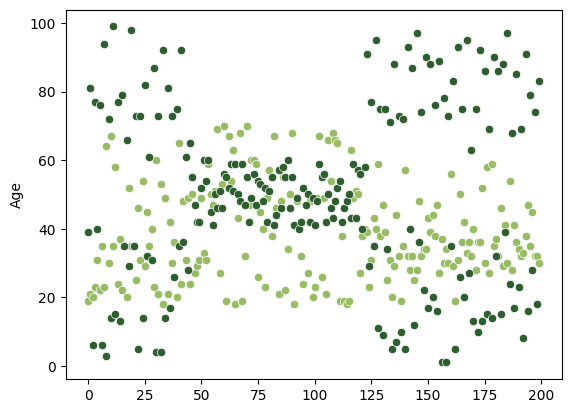

In [7]:
sns.scatterplot(df["Age"],color='#97BC62FF') 
sns.scatterplot(df["Spending Score (1-100)"],color='#2C5F2D') 

Multi-Variate

e:\IBM Project\trial\learning_venv\lib\site-packages\seaborn\external\kde.py:265: RuntimeWarning: invalid value encountered in true_divide
  result = result / self._norm_factor
e:\IBM Project\trial\learning_venv\lib\site-packages\seaborn\external\kde.py:353: RuntimeWarning: invalid value encountered in sqrt
  self._norm_factor = sqrt(linalg.det(2*pi*self.covariance))
e:\IBM Project\trial\learning_venv\lib\site-packages\seaborn\distributions.py:1188: UserWarning: No contour levels were found within the data range.
  **contour_kws,
e:\IBM Project\trial\learning_venv\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
e:\IBM Project\trial\learning_venv\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
e:\IBM Project\trial\learning_venv\lib\site-packages\seaborn\distributions.py:1188: UserWarning: No contour levels were found wi

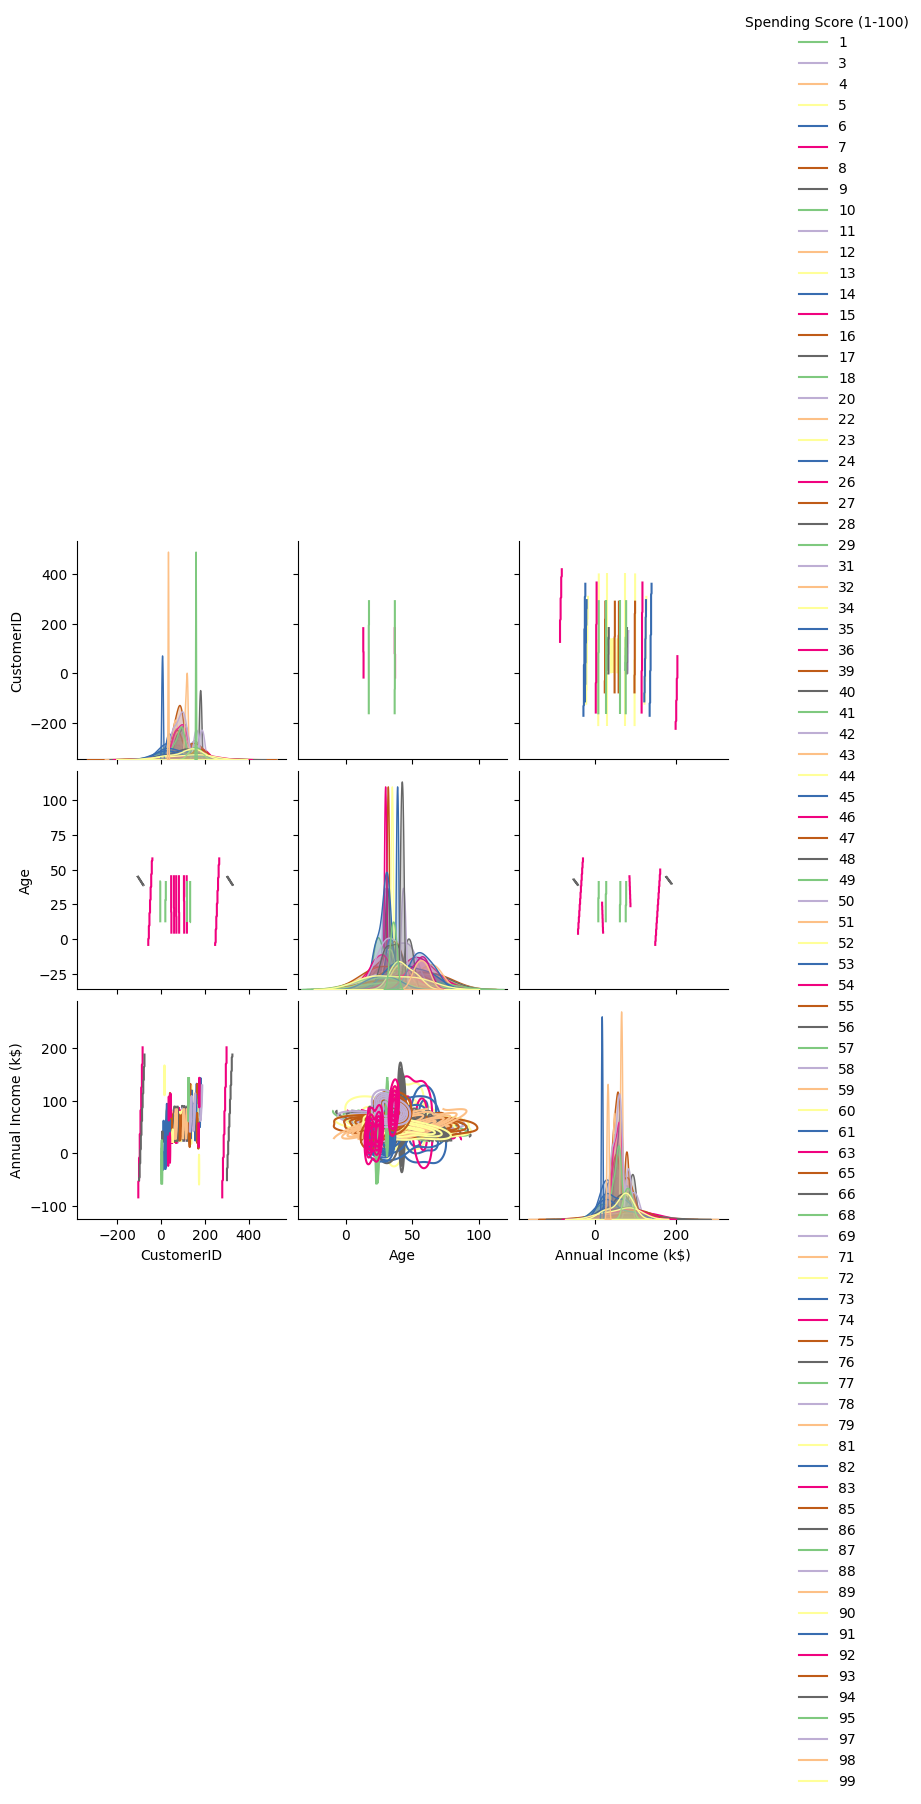

In [8]:
sns.pairplot(df, kind="kde", hue="Spending Score (1-100)", palette="Accent")

Descriptive Stats

In [9]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


Missing Values

In [31]:
df.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


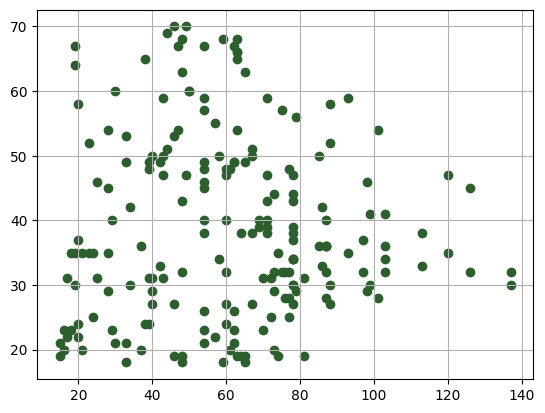

In [32]:
plt.scatter(x = df['Annual Income (k$)'], y = df['Age'], c="#2C5F2D")
plt.grid(True)

In [33]:
df = df[(df['Annual Income (k$)'] <= 110)]

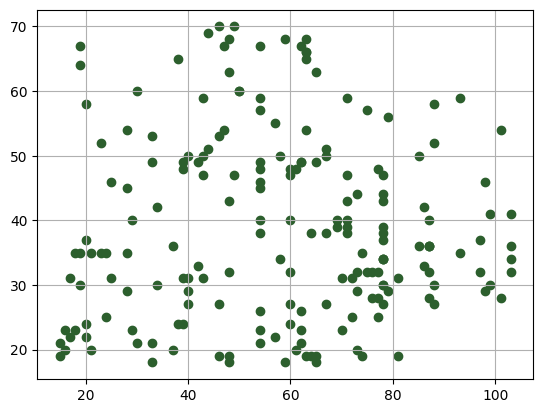

In [34]:
plt.scatter(x = df['Annual Income (k$)'], y = df['Age'], c="#2C5F2D")
plt.grid(True)

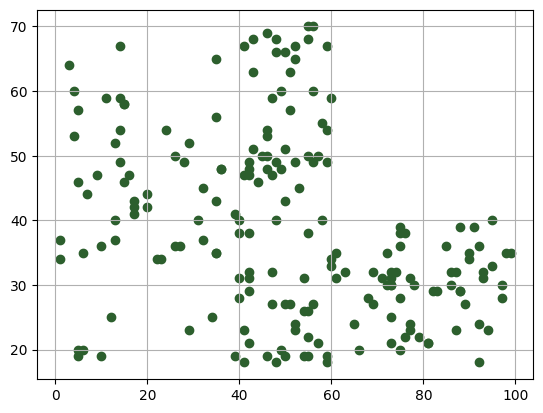

In [16]:
plt.scatter(x = df['Spending Score (1-100)'], y = df['Age'], c="#2C5F2D")
plt.grid(True)

Encoding

In [36]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [37]:
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

e:\IBM Project\trial\learning_venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0])

In [38]:
df.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

Splitting

In [39]:
y = df['Age']
x = df

In [41]:
x.drop('Age',axis=1, inplace=True)
x

e:\IBM Project\trial\learning_venv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,0,16,6
3,4,0,16,77
4,5,0,17,40
...,...,...,...,...
187,188,1,101,68
188,189,0,103,17
189,190,0,103,85
190,191,0,103,23


In [42]:
y

0      19
1      21
2      20
3      23
4      31
       ..
187    28
188    41
189    36
190    34
191    32
Name: Age, Length: 192, dtype: int64

Model Building

In [43]:
standardScale = StandardScaler()
x=standardScale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [44]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [45]:
regressor.fit(x_train, y_train)
regressor.score(x_train,y_train)*100

87.7432451548589

In [46]:
regressor.fit(x_test, y_test)
regressor.score(x_test,y_test)*100

85.30775904076386